<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-09-25 09:04:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.5’

survey-results-publ 100%[===================>] 201.62M  72.2MB/s    in 2.8s    

2025-09-25 09:04:34 (72.2 MB/s) - ‘survey-results-public.sqlite.5’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 157.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 199.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 182.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 169.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 157.0 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

In [18]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


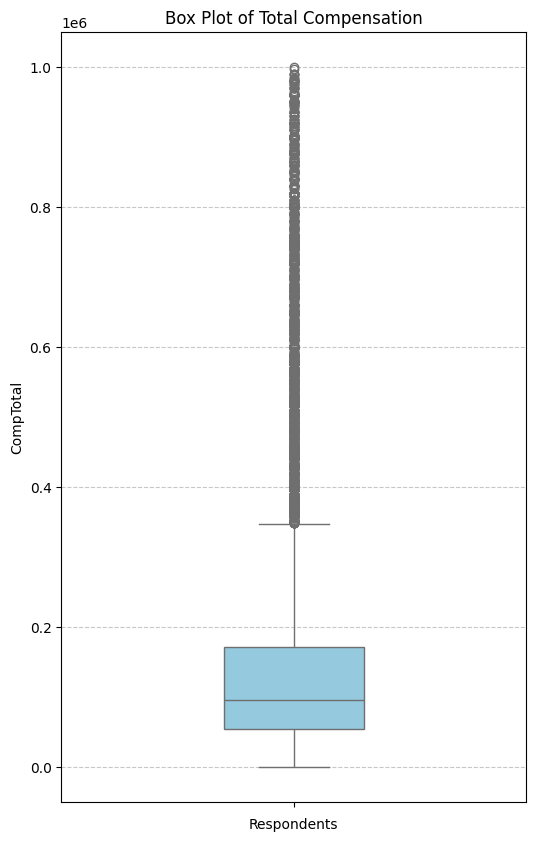

In [8]:
# your code goes here
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Query the relevant column
query = "SELECT CompTotal FROM main"
df = pd.read_sql_query(query, conn)

# Convert CompTotal to numeric and drop missing values
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
df = df.dropna(subset=["CompTotal"])

# filter out extreme outliers for better visualization
df = df[df["CompTotal"] < 1e6]  # Adjust threshold as needed

# Plot box plot with CompTotal 
plt.figure(figsize=(6, 10))
sns.boxplot(y=df["CompTotal"], color="skyblue", width=0.3)
plt.title("Box Plot of Total Compensation")
plt.xlabel("Respondents")
plt.ylabel("CompTotal")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


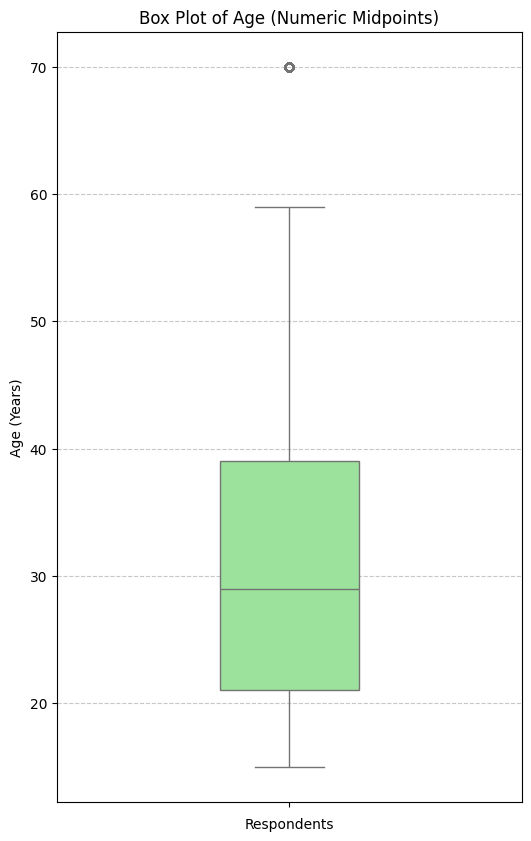

In [9]:
# your code goes here

# Query Age column
query = "SELECT Age FROM main"
df = pd.read_sql_query(query, conn)

# Map age ranges to numeric midpoints
age_map = {
    "Under 18 years old": 15,
    "18-24 years old": 21,
    "25-34 years old": 29,
    "30-34 years old": 32,
    "35-44 years old": 39,
    "45-54 years old": 49,
    "55-64 years old": 59,
    "65 years or older": 70
}
df["AgeNum"] = df["Age"].map(age_map)

# Drop missing values
df = df.dropna(subset=["AgeNum"])

# Plot box plot with AgeNum 
plt.figure(figsize=(6, 10))
sns.boxplot(y=df["AgeNum"], color="lightgreen", width=0.3)
plt.title("Box Plot of Age (Numeric Midpoints)")
plt.xlabel("Respondents")
plt.ylabel("Age (Years)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


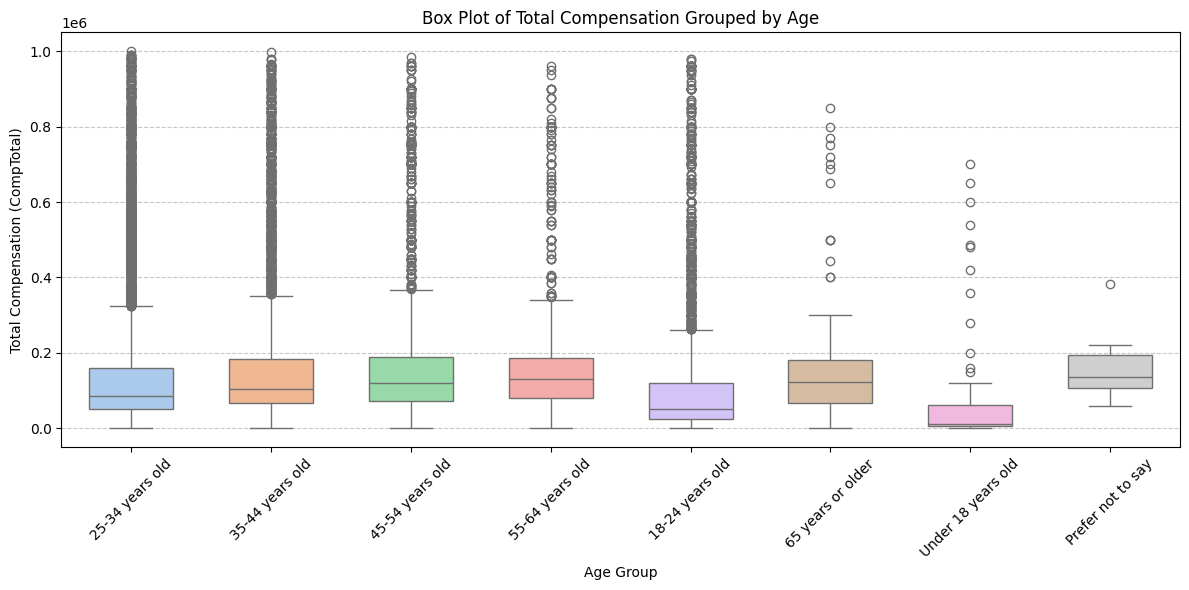

In [10]:
# your code goes here

# Query Age and CompTotal columns
query = "SELECT Age, CompTotal FROM main"
df = pd.read_sql_query(query, conn)

# Convert CompTotal to numeric and drop missing values
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
df = df.dropna(subset=["Age", "CompTotal"])

# filter out extreme outliers for better visualization
df = df[df["CompTotal"] < 1e6]  # Adjust threshold as needed

# Plot box plot grouped by Age
plt.figure(figsize=(12, 6))
sns.boxplot(x="Age", y="CompTotal", data=df, width=0.6, palette="pastel", hue="Age", legend=False)

plt.title("Box Plot of Total Compensation Grouped by Age")
plt.xlabel("Age Group")
plt.ylabel("Total Compensation (CompTotal)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


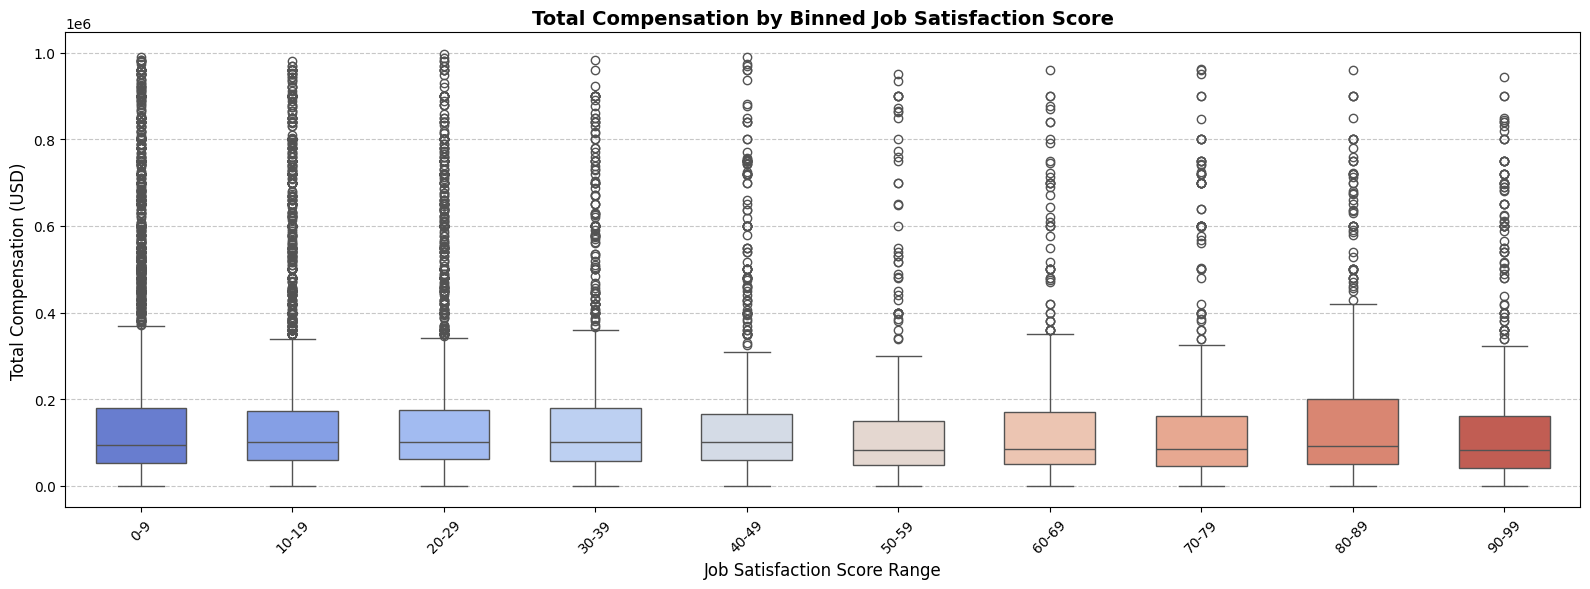

In [11]:
# your code goes here

# Query relevant columns
query = "SELECT JobSatPoints_6, CompTotal FROM main"
df = pd.read_sql_query(query, conn)

# Clean data
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
# Ensure JobSatPoints_6 is numeric
df["JobSatPoints_6"] = pd.to_numeric(df["JobSatPoints_6"], errors="coerce")

bins = list(range(0, 101, 10))  # Bins: 0–10, 11–20, ..., 91–100
labels = [f"{i}-{i+9}" for i in bins[:-1]]
df["ScoreBin"] = pd.cut(df["JobSatPoints_6"], bins=bins, labels=labels, include_lowest=True)

# Drop missing values
df = df.dropna(subset=["JobSatPoints_6", "CompTotal"])

# Filter out extreme outliers
df = df[df["CompTotal"] < 1e6]

# Create the box plot
plt.figure(figsize=(16, 6))
sns.boxplot(x="ScoreBin", y="CompTotal", data=df, width=0.6, palette="coolwarm", hue="ScoreBin")
plt.legend([], [], frameon=False)  # Hide legend manually
plt.title("Total Compensation by Binned Job Satisfaction Score", fontsize=14, weight="bold")
plt.xlabel("Job Satisfaction Score Range", fontsize=12)
plt.ylabel("Total Compensation (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()





### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


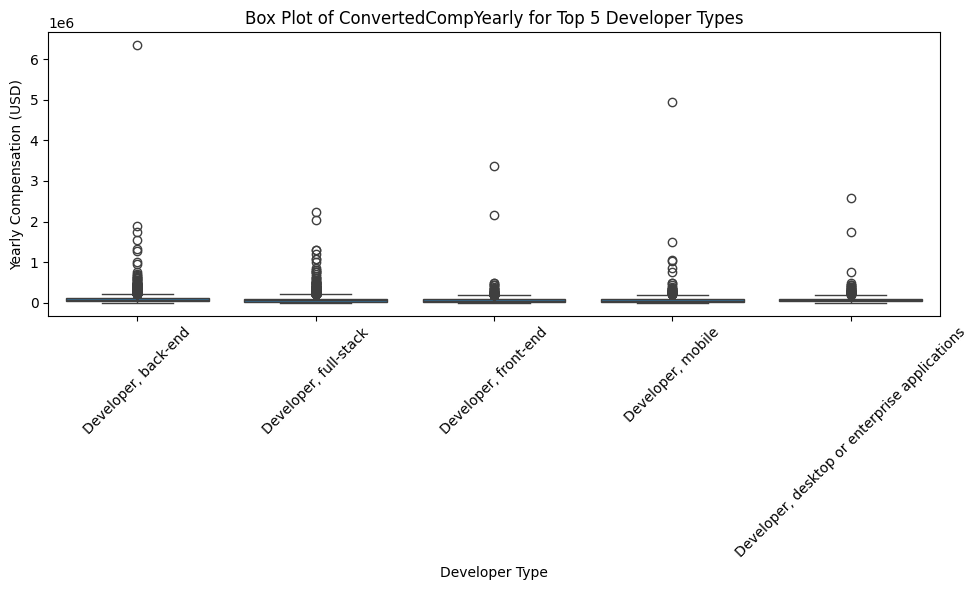

In [12]:
# your code goes here

# Query relevant columns
query = "SELECT DevType, ConvertedCompYearly FROM main"
df = pd.read_sql_query(query, conn)

df = df[['DevType', 'ConvertedCompYearly']].dropna()

# Split DevType into individual roles
df['DevType'] = df['DevType'].str.split(';')
df_exploded = df.explode('DevType')

# Clean whitespace
df_exploded['DevType'] = df_exploded['DevType'].str.strip()

# Get top 5 developer types
top_5_roles = df_exploded['DevType'].value_counts().nlargest(5).index.tolist()

# Filter for top 5 roles
df_top5 = df_exploded[df_exploded['DevType'].isin(top_5_roles)]

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='DevType', y='ConvertedCompYearly', data=df_top5)
plt.xticks(rotation=45)
plt.title('Box Plot of ConvertedCompYearly for Top 5 Developer Types')
plt.ylabel('Yearly Compensation (USD)')
plt.xlabel('Developer Type')
plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


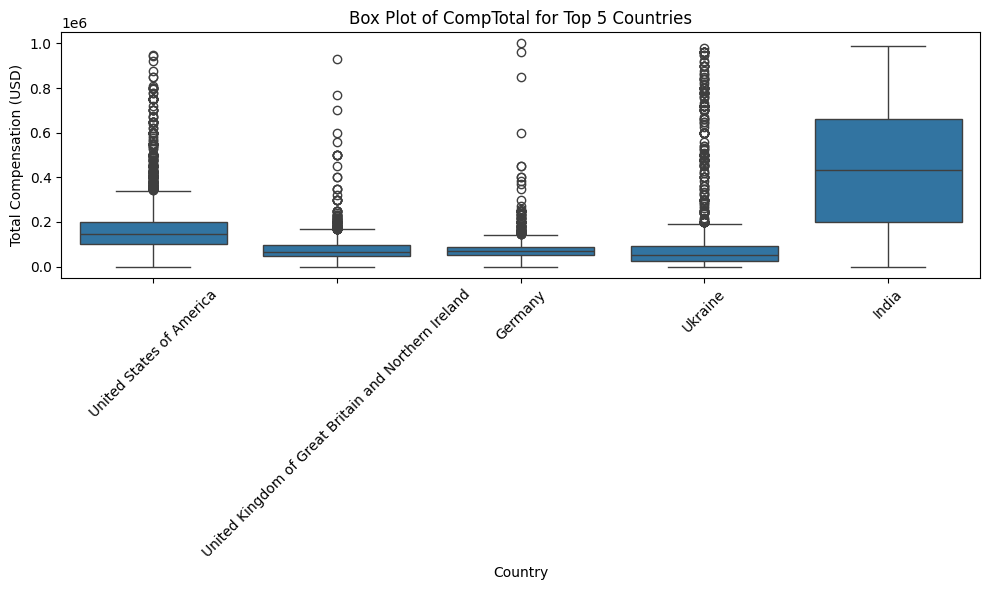

In [13]:
# your code goes here

# Load relevant data
query = "SELECT Country, CompTotal FROM main"
df = pd.read_sql_query(query, conn)

#  Identify top 5 countries by respondent count
top_5_countries = df['Country'].value_counts().nlargest(5).index.tolist()

#  Filter data for top 5 countries
df_top5 = df[df['Country'].isin(top_5_countries)]

# Remove extreme outliers 
df_top5 = df_top5[df_top5["CompTotal"] < 1e6]

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='CompTotal', data=df_top5)
plt.title('Box Plot of CompTotal for Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Total Compensation (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


<Figure size 800x600 with 0 Axes>

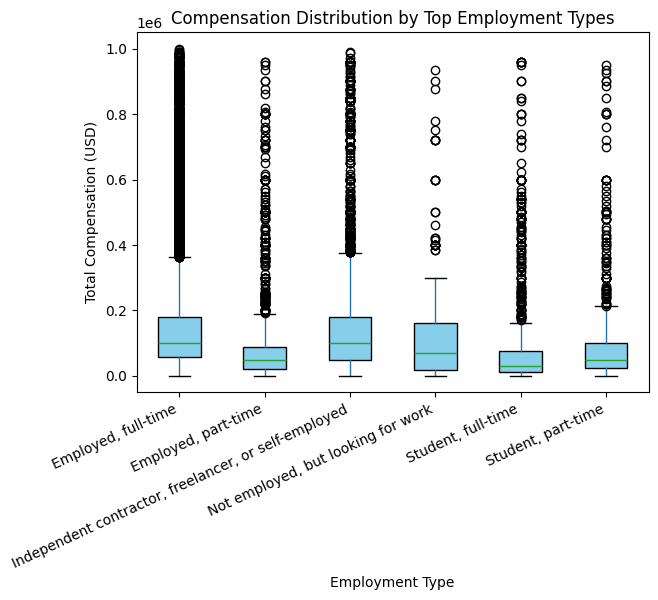

In [20]:
# your code goes here

# SLoad relevant data
query = "SELECT Employment, CompTotal FROM main"
df = pd.read_sql_query(query, conn)

# Remove extreme outliers
df = df[df['CompTotal'] < 1e6]

# Split multiple employment types into separate rows
df_expanded = df.assign(Employment=df["Employment"].str.split(";")).explode("Employment")
df_expanded["Employment"] = df_expanded["Employment"].str.strip()

# Keep only top 6 employment categories (by frequency)
top_employment = df_expanded["Employment"].value_counts().head(6).index
df_top = df_expanded[df_expanded["Employment"].isin(top_employment)]

# Box Plot
plt.figure(figsize=(8,6))
df_top.boxplot(column="CompTotal", by="Employment", grid=False, patch_artist=True,
               boxprops=dict(facecolor="skyblue", color="black"))

plt.title("Compensation Distribution by Top Employment Types")
plt.suptitle("")
plt.xlabel("Employment Type")
plt.ylabel("Total Compensation (USD)")
plt.xticks(rotation=25, ha="right")
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


<Figure size 1000x600 with 0 Axes>

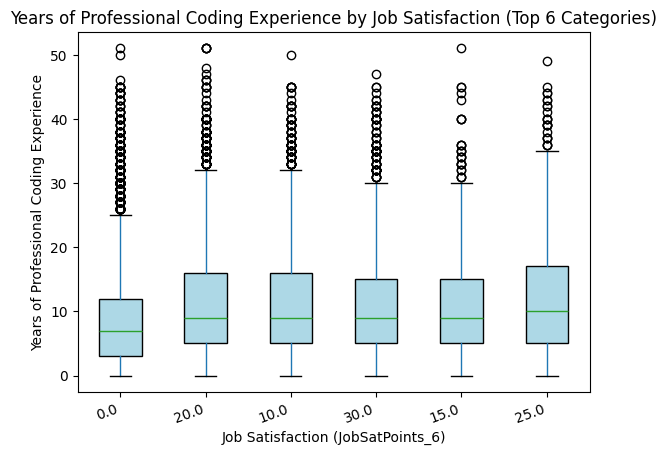

In [21]:
# your code goes here
# Query data
query = "SELECT YearsCodePro, JobSatPoints_6 FROM main"
df = pd.read_sql_query(query, conn)

# Clean YearsCodePro
df["YearsCodePro"] = df["YearsCodePro"].replace({
    "Less than 1 year": "0",
    "More than 50 years": "51"
})
df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors="coerce")

# Drop NaNs
df = df.dropna(subset=["YearsCodePro", "JobSatPoints_6"])

# Keep only top 6 most frequent JobSatPoints_6
top_cats = df["JobSatPoints_6"].value_counts().nlargest(6).index
df = df[df["JobSatPoints_6"].isin(top_cats)]

# Reorder categories by frequency
df["JobSatPoints_6"] = pd.Categorical(df["JobSatPoints_6"], categories=top_cats, ordered=True)

# Box Plot
plt.figure(figsize=(10,6))
df.boxplot(column="YearsCodePro", by="JobSatPoints_6", grid=False, patch_artist=True,
           boxprops=dict(facecolor="lightblue", color="black"))

plt.title("Years of Professional Coding Experience by Job Satisfaction (Top 6 Categories)")
plt.suptitle("")
plt.xlabel("Job Satisfaction (JobSatPoints_6)")
plt.ylabel("Years of Professional Coding Experience")
plt.xticks(rotation=20, ha="right")
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [22]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
